In [137]:
#데이터 준비하기 
import pandas as pd

train_data = pd.read_csv("E:\데이콘\\전복나이 예측\\데이터\\train.csv")

ques_data = pd.read_csv("E:\데이콘\\전복나이 예측\\데이터\\test.csv")

In [138]:
print("asd")

asd


Viscra 내장
Shucked Weight  the weight without the shell
Shell Weight 껍질 무게


제거할 번호 465, 762, 47, 382, 435, 1078

In [139]:
train_data[train_data['Viscra Weight']>train_data['Shucked Weight']]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
465,466,M,0.415,0.315,0.125,0.388,0.068,0.09,0.125,12


In [140]:
train_data[(train_data['Viscra Weight']+train_data['Shucked Weight'])>train_data['Whole Weight']]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
47,48,I,0.380,0.275,0.095,0.1375,0.0860,0.0585,0.0605,7
382,383,I,0.455,0.330,0.100,0.3720,0.3580,0.0775,0.1100,8
435,436,I,0.475,0.365,0.100,0.1315,0.2025,0.0875,0.1230,7
1078,1079,I,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315,5


In [141]:
train_data[train_data['Shucked Weight']>train_data['Whole Weight']]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
435,436,I,0.475,0.365,0.10,0.1315,0.2025,0.0875,0.1230,7
1078,1079,I,0.275,0.205,0.07,0.1055,0.4950,0.0190,0.0315,5


In [142]:
print(train_data.shape)
train_data.drop(index=762,axis =0,inplace= True)
train_data.drop(index=465,axis =0,inplace= True)
train_data.drop(index=47,axis =0,inplace= True)
train_data.drop(index=382,axis =0,inplace= True)
train_data.drop(index=435,axis =0,inplace= True)
train_data.drop(index=1078,axis =0,inplace= True)

(1253, 10)


In [143]:
print(train_data.shape)

(1247, 10)


In [144]:
#water = 전체무게 -(껍질무게+껍질을 제외한 무게) 보다 ratio=껍질을 제외한 무게/전체 무게 
water_train = train_data['Whole Weight'] -train_data['Shucked Weight']
water_ques = ques_data['Whole Weight'] -ques_data['Shucked Weight']

In [145]:
#train_data['Water'] = water_train
#ques_data['Water'] = water_ques

In [146]:
Ratio_train =  train_data['Shucked Weight']/train_data['Whole Weight'] 
Ratio_ques =  ques_data['Shucked Weight']/ques_data['Whole Weight'] 
train_data['Ratio'] = Ratio_train
ques_data['Ratio'] = Ratio_ques
print(train_data.head())
ques_data.head()

   id Gender  Lenght  Diameter  Height  Whole Weight  Shucked Weight  \
0   1      M   0.605     0.470   0.115        1.1140          0.3925   
1   2      I   0.430     0.315   0.095        0.3780          0.1750   
2   3      I   0.580     0.490   0.195        1.3165          0.5305   
3   4      M   0.535     0.405   0.175        1.2705          0.5480   
4   5      I   0.310     0.235   0.090        0.1270          0.0480   

   Viscra Weight  Shell Weight  Target     Ratio  
0         0.2910        0.3100      15  0.352334  
1         0.0800        0.1045       8  0.462963  
2         0.2540        0.4100      18  0.402962  
3         0.3265        0.3370      13  0.431326  
4         0.0310        0.0400       6  0.377953  


,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Ratio
0,1,F,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550,0.402765
1,2,M,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600,0.297735
2,3,I,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305,0.427835
3,4,M,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300,0.412886
4,5,F,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050,0.464960


In [147]:
train_target = train_data['Target']
print(train_data.shape,ques_data.shape,train_target.shape)
train_data.drop(['id', 'Target'], axis=1,inplace=True)
ques_data.drop(['id'], axis=1,inplace=True)
train_data = pd.get_dummies(train_data)
ques_data = pd.get_dummies(ques_data)

print(train_data.shape,ques_data.shape,train_target.shape)

(1247, 11) (2924, 10) (1247,)
(1247, 11) (2924, 11) (1247,)


In [148]:
train_max_input = train_data.to_numpy()
train_max_target = train_target.to_numpy()
ques_input =ques_data.to_numpy()

In [149]:
from sklearn.model_selection import train_test_split
#훈련세트와 테스트 세트 나누기
train_input, test_input, train_target, test_target = train_test_split(train_max_input,train_max_target, test_size=0.2, random_state=30)
print(train_input.shape)
print(test_input.shape)
print(train_max_input.shape)

(997, 11)
(250, 11)
(1247, 11)


In [150]:
#훈련세트랑 검증세트도
sub_input, val_input,sub_target, val_target = train_test_split(train_input,train_target, test_size=0.2,random_state=30)
print(train_input.shape)
print(sub_input.shape)
print(val_input.shape)

(997, 11)
(797, 11)
(200, 11)


In [151]:
#특성공학으로 특성 늘리기
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias= False)
poly.fit(sub_input)
train_max_poly = poly.transform(train_max_input)
ques_poly=poly.transform(ques_input)
train_poly=poly.transform(train_input)
test_poly = poly.transform(test_input)
sub_poly=poly.transform(sub_input)
val_poly = poly.transform(val_input)

In [152]:
#규제 전 전처리 과정
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(sub_poly)
train_scaled = ss.transform(train_poly)
sub_scaled = ss.transform(sub_poly)
val_scaled = ss.transform(val_poly)
train_max_scaled = ss.transform(train_max_poly)
ques_scaled = ss.transform(ques_poly)
test_scaled = ss.transform(test_poly)

In [153]:
sub_scores =[]
val_scores = []

In [154]:
#최적의 alpha값 찾기
import numpy as np
from sklearn.linear_model import Ridge
alpha_list = [0.001,0.01,0.1,1,10,100,1000,10000]
for alpha in alpha_list:
    ridge= Ridge(alpha=alpha)
    ridge.fit(sub_scaled, sub_target)
    sub_scores.append(ridge.score(sub_scaled,sub_target))
    val_scores.append(ridge.score(val_scaled,val_target))
    
print(sub_scores)
print(val_scores)
print(sub_scores[np.argmax(val_scores)])
print(np.max(val_scores))
print(alpha_list[np.argmax(val_scores)])

[0.5856780939854798, 0.5842003186867455, 0.5790704725883173, 0.5671863652527971, 0.5520164484678205, 0.5178384990152508, 0.4640866111428279, 0.3096432917687113]
[0.5238669133658975, 0.5216244476378011, 0.5296787433559411, 0.5464826672455578, 0.5517561867452083, 0.5467614372339333, 0.514437548106141, 0.35298768495499366]
0.5520164484678205
0.5517561867452083
10


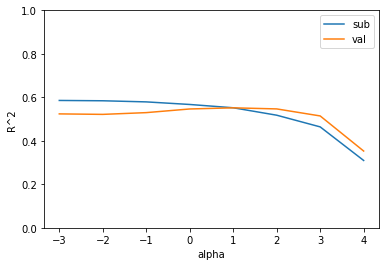

In [155]:
import matplotlib.pyplot as plt
plt.plot(np.log10(alpha_list),sub_scores)
plt.plot(np.log10(alpha_list),val_scores)
plt.ylim(0, 1)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['sub','val'])
plt.show()

In [156]:
#최종 확인
ridge =Ridge(alpha=10)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.5584171530549054
0.609085552316235


In [157]:
#답 구하기
ridge.fit(train_max_scaled,train_max_target)
ans=ridge.predict(ques_scaled)

In [158]:
submission = pd.read_csv("E:\데이콘\전복나이 예측\데이터\sample_submission.csv")
submission['Target'] = ans
submission.to_csv("Submit_8(피처추가1+릿지).csv",index=False)